**REGULAR CNN - number of filters in each layer increases (Lth layer have more filters than (L-1)th layer)**

# INITIALIZATION

In [22]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0 #normalizing
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


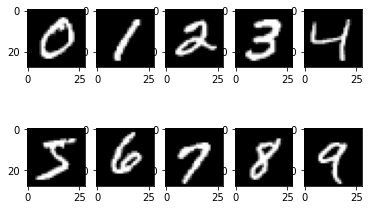

In [24]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [25]:
x_train = train_images.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = test_images.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


For testing different parameters in the model, I will run it through the parameters as below:

- Learning rate 0.0005, 0.001, 0.01, 0.05, 0.1
- Batch size from 2^6 to 2^10 (64, 128, 256, 512, 1024)
- Optimization: SGD, adam, RMSProp

I set a = 3 as the starting number of filter in the first convolutional layer, so I can add 1 more filter as the depth of the NN grows

# LEARNING RATE OPTIMIZATION
Set batch size = 256

In [26]:
a = 3
learning_rate = [0.0005, 0.001, 0.01, 0.05, 0.1]

for b in range(8,9):
    for j in range(0,5):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model1 = cnn_model
        # Train the model.
        model1.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model1.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.0005, batch size:256
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_280 (Conv2D)         (1, 28, 28, 4)            40        
                                                                 
 conv2d_281 (Conv2D)         (1, 28, 28, 5)            185       
                                                                 
 max_pooling2d_112 (MaxPooli  (1, 14, 14, 5)           0         
 ng2D)                                                           
                                                                 
 conv2d_282 (Conv2D)         (1, 14, 14, 6)            276       
                                                                 
 conv2d_283 (Conv2D)         (1, 14, 14, 7)            385       
                                                                 
 max_pooling2d_113 (MaxPooli  (1, 7, 7, 7)             0         

# BATCH SIZE
Optimum learning rate 0.001 will be used to test with different batch size

In [27]:
learning_rate = [0.001]
a = 3
for b in range(6,11):
    for j in range(0,1):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model2 = cnn_model
        # Train the model.
        model2.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model2.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.001, batch size:64
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_330 (Conv2D)         (1, 28, 28, 4)            40        
                                                                 
 conv2d_331 (Conv2D)         (1, 28, 28, 5)            185       
                                                                 
 max_pooling2d_132 (MaxPooli  (1, 14, 14, 5)           0         
 ng2D)                                                           
                                                                 
 conv2d_332 (Conv2D)         (1, 14, 14, 6)            276       
                                                                 
 conv2d_333 (Conv2D)         (1, 14, 14, 7)            385       
                                                                 
 max_pooling2d_133 (MaxPooli  (1, 7, 7, 7)             0         
 

# OPTIMIZER: SGD, RMSProp

Change opt = tf.keras.optimizers.Adam(learning_rate=learning_rate[j]) to:

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate[j]) and 

opt = tf.keras.optimizers.RMSProp(learning_rate=learning_rate[j])

In [30]:
learning_rate = [0.001]
a = 3
for b in range(6,7):
    for j in range(0,1):
        print('With 10 epochs, learning rate: ' + str(learning_rate[j])+ ', batch size:' + str(2**b))
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate[j])
        cnn_model = tf.keras.models.Sequential()
        for i in range(1,11):
            if i%2==0:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, strides=(1, 1), padding='same', activation='relu'))
                if i<9:
                    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
            else:
                cnn_model.add(tf.keras.layers.Conv2D(filters = a+i, kernel_size = 3, padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())
        cnn_model.add(tf.keras.layers.Dense(256))
        cnn_model.add(tf.keras.layers.Activation('relu'))
        cnn_model.add(tf.keras.layers.Dense(10))
        cnn_model.add(tf.keras.layers.Activation('softmax'))

        cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
                          metrics=['accuracy'])
        cnn_model.build(input_shape=(1,28,28,1))
        cnn_model.summary()

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

        model3 = cnn_model
        # Train the model.
        model3.fit(
            x_train,
            train_labels, 
            batch_size=2**b,
            epochs=10, 
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model3.evaluate(x_test, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

With 10 epochs, learning rate: 0.001, batch size:64
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_400 (Conv2D)         (1, 28, 28, 4)            40        
                                                                 
 conv2d_401 (Conv2D)         (1, 28, 28, 5)            185       
                                                                 
 max_pooling2d_160 (MaxPooli  (1, 14, 14, 5)           0         
 ng2D)                                                           
                                                                 
 conv2d_402 (Conv2D)         (1, 14, 14, 6)            276       
                                                                 
 conv2d_403 (Conv2D)         (1, 14, 14, 7)            385       
                                                                 
 max_pooling2d_161 (MaxPooli  (1, 7, 7, 7)             0         
 